<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Probability-Density" data-toc-modified-id="Probability-Density-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Probability Density</a></span></li><li><span><a href="#Wavefunction" data-toc-modified-id="Wavefunction-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Wavefunction</a></span></li></ul></div>

# Imports

In [1]:
import numpy as np
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

plt.style.use("ggplot")

# Probability Density

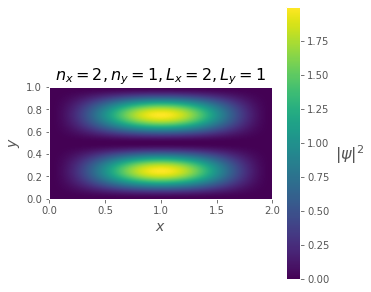

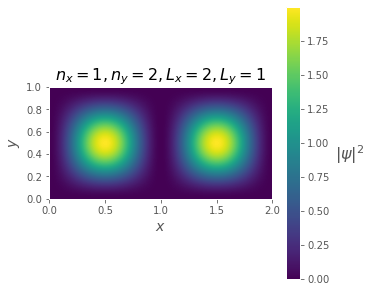

In [2]:
def Psi(x, y, nx, ny, Lx, Ly):
    return 2 / np.sqrt(Lx * Ly) * np.outer(np.sin(nx * x * np.pi / Lx) , 
                                    np.sin(ny * y * np.pi / Ly) )

def plot_absPsi(Lx, Ly, nx, ny):
    """
    Plot av sannsynlighetstettheten til Psi
    """
    x, y = np.linspace(0, Lx, 500), np.linspace(0, Ly, 500)
    grid = Psi(x, y, nx, ny, Lx, Ly) ** 2

    plt.figure(figsize=(5, 5))
    plt.imshow(grid, extent=(x.min(), x.max(), y.min(), y.max()))
    plt.title(r"$n_x={},n_y={}, L_x={},L_y={}$".format(nx, ny, Lx, Ly), fontsize=16)
    plt.xlabel(r"$x$", fontsize=14)
    plt.ylabel(r"$y$", fontsize=14)
    plt.grid()
    cbar = plt.colorbar(plt.imshow(grid, extent=(x.min(), x.max(), y.min(), y.max())))
    cbar.set_label(r"$|\psi|^2$", rotation=0, labelpad=20, fontsize=16)
    plt.show()

# Plotter sannsynlighetstettheten inne i boksen for ulike nx og ny. Fargen representerer sannsynligheten (gult = stor sanns)
plot_absPsi(Lx=2, Ly=1, nx=2, ny=1)
plot_absPsi(Lx=2, Ly=1, nx=1, ny=2)

# Wavefunction

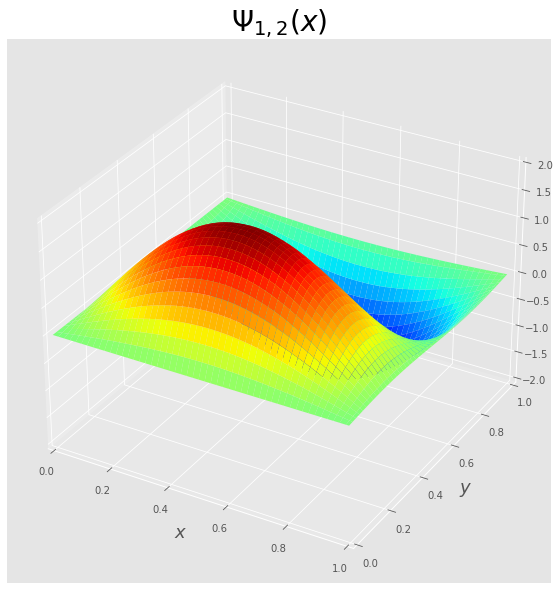

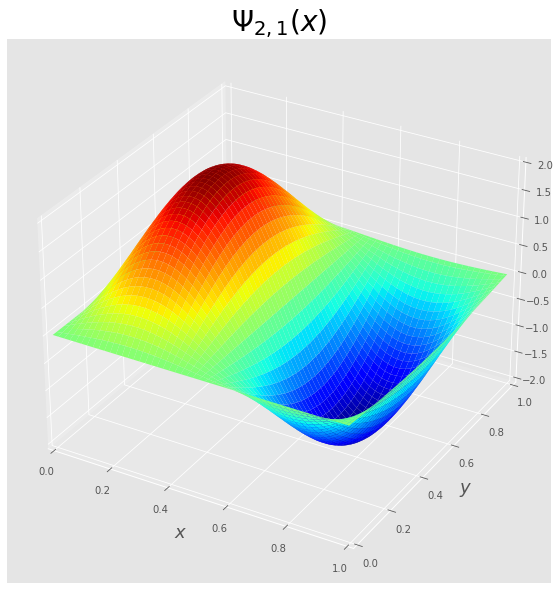

In [3]:
def Psi(x, y, nx, ny, Lx, Ly):
    return 2 / np.sqrt(Lx * Ly) * np.sin(nx * x * np.pi / Lx) * np.sin(ny * y * np.pi / Ly) 

def plot_3d_Psi(nx, ny, Lx, Ly):
    """
    Plot at 3dimensjonal bølgefunksjon
    """
    x_grid, y_grid = np.mgrid[0:Lx:.01, 0:Ly:.01]
    grid = Psi(x_grid, y_grid, nx, ny, Lx, Ly)

    pos = np.empty(x_grid.shape + (2,))
    pos[:, :, 0] = x_grid
    pos[:, :, 1] = y_grid

    fig = plt.figure(figsize=(10, 10))
    ax = fig.gca(projection='3d')

    ax.plot_surface(x_grid, y_grid, grid, cmap=cm.jet)

    ax.set_title(r"$\Psi_{{{},{} }}(x)$".format(nx,ny), fontsize=28)
    ax.set_xlim3d(0, Lx)
    ax.set_ylim3d(0, Ly)
    ax.set_zlim3d(grid.min(), grid.max())
    ax.set_xlabel(r"$x$", fontsize=18)
    ax.set_ylabel(r"$y$", fontsize=18)
    plt.show()
    
Lx, Ly = 1, 1
nx, ny = 1, 2
plot_3d_Psi(nx, ny, Lx, Ly)
Lx, Ly = 1, 1
nx, ny = 2, 1
plot_3d_Psi(nx, ny, Lx, Ly)